In [111]:
!pip install -U airportsdata

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import airportsdata
import re
airports = airportsdata.load('IATA')  # key is the IATA location code

In [113]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 0: Import The Dataset


In [114]:
df = pd.read_csv("/content/drive/MyDrive/British Airways Review Project/rating_data.csv")
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,December 2022,1.0,1.0,1.0,3.0,1.0,NaN,1,no
1,A320,Solo Leisure,Business Class,London to Marrakech,June 2022,3.0,5.0,5.0,NaN,4.0,NaN,3,yes
2,A380,Solo Leisure,Economy Class,San Francisco to London,November 2022,2.0,1.0,2.0,2.0,3.0,1.0,2,no
3,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,3.0,NaN,3,yes
4,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,4.0,NaN,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,NaN,NaN,Premium Economy,NaN,NaN,4.0,3.0,3.0,4.0,NaN,NaN,4,yes
3423,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,0.0,NaN,NaN,3,yes
3424,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,yes
3425,NaN,NaN,Premium Economy,NaN,NaN,1.0,3.0,5.0,0.0,NaN,NaN,1,no


# Step 1: Check For Missing Values

To ensure the dataset is complete, I started by identifying any missing
(incomplete) values in each column. Using the .isnull() method, I checked each cell for missing data and summed up the results for each column.

In [115]:
#Checking for missing values
missing_values = df.isnull().sum()
missing_values

,0
Aircraft,1637
Type Of Traveller,770
Seat Type,2
Route,774
Date Flown,778
Seat Comfort,98
Cabin Staff Service,105
Food & Beverages,330
Inflight Entertainment,1012
Ground Service,836


**Explanation:**


*   .isnull(): This method checks each cell in the DataFrame and returns True if the cell contains a missing value (NaN).
.sum(): This method counts the number of True values (i.e., missing values) for each column.

**Findings:**

Several columns contain a large number of missing values, including Aircraft, Route, Wifi & Connectivity, and Inflight Entertainment.
Some columns, such as Seat Type, have very few missing values (only 2), which can be handled easily.
Next Step: The next task is to decide how to handle these missing values. This could involve removing rows or columns, filling in missing values, or deciding to leave some entries as missing.



---



# Step 2: Investigating the Source of Missing Data

After identifying missing values in the dataset, I explored the website from which the data was retrieved to understand the data entry process. Through this investigation, I observed that the form requires users to fill in every field. However, some fields such as Food & Beverages, Inflight Entertainment, and Wifi & Connectivity could be marked as “N/A” if not applicable.

Despite the required nature of many fields, I found that several columns, including Aircraft, Type of Traveller, Route, and Date Flown, contained missing (NaN) values. Based on these findings, I made the following observations:

*   User Input Error or Data Transfer Issue: Some fields might not have been captured correctly by the website, or users made errors during submission.
*   Legitimate Missing Values: Columns such as Food & Beverages, Inflight Entertainment, and Wifi & Connectivity contain missing values because users may have selected "N/A" for these options.

Next Step:
To handle the missing values, I will first decide which rows or columns to remove based on the number of missing values, and then impute missing values where appropriate (e.g., using averages for numerical data or the most common value for categorical data).

Here is a summary of the findings and plan for handling missing values:


*   Remove rows with excessive missing data.
*   Impute missing values for other columns based on the type of data.





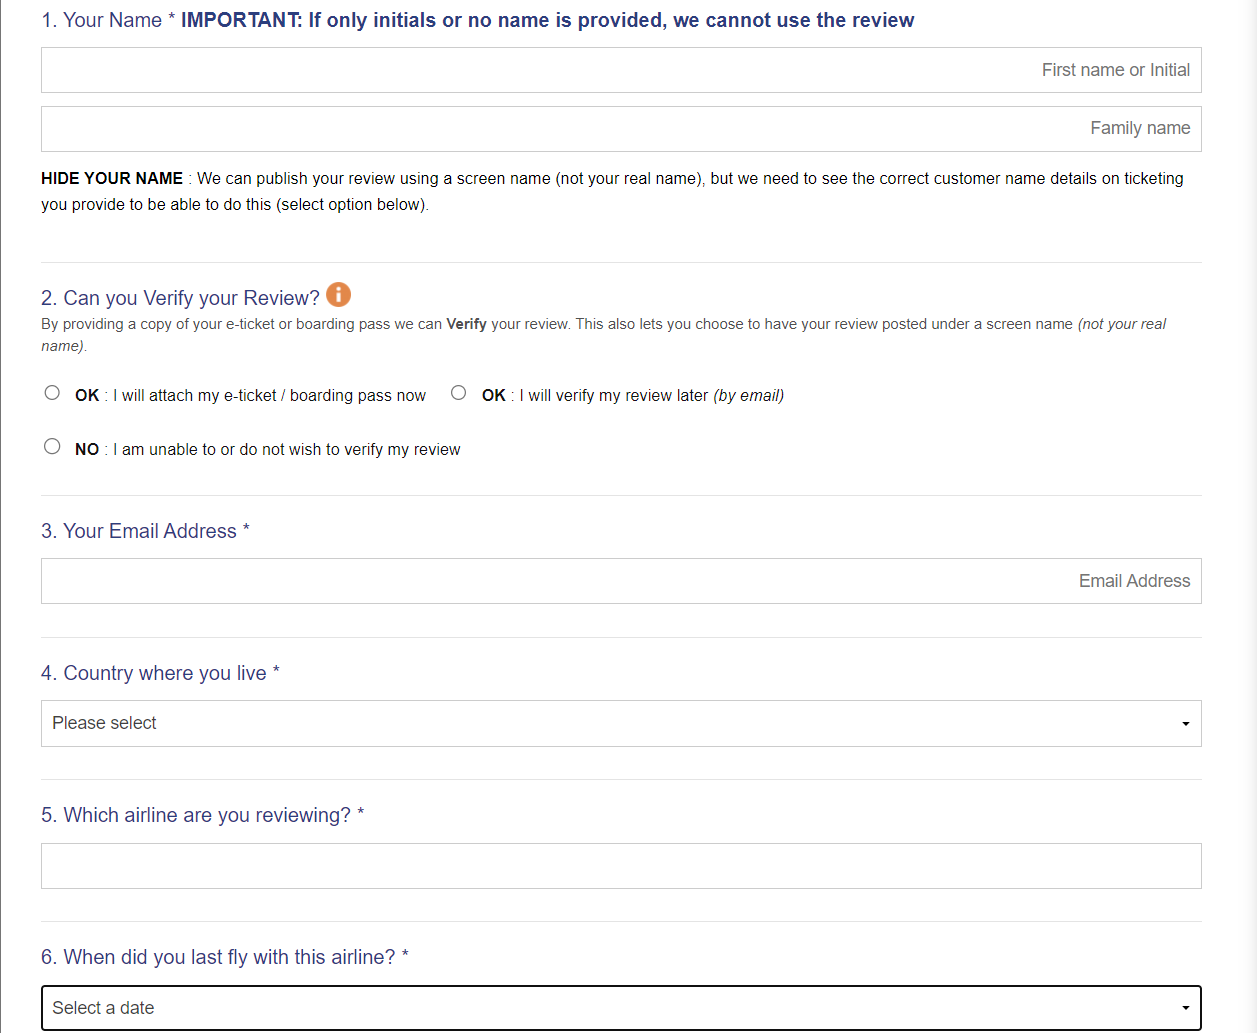

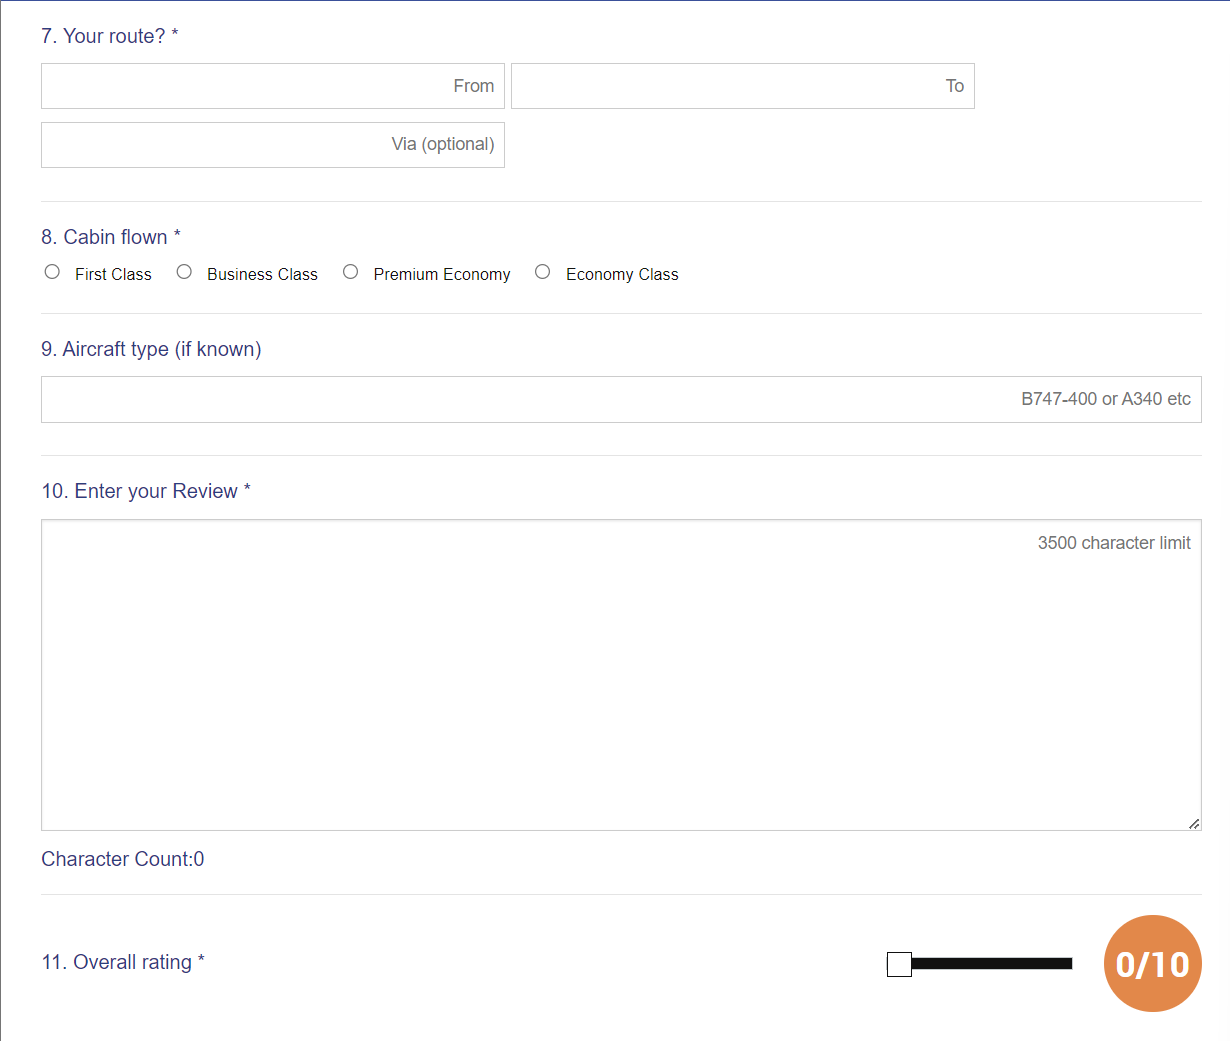

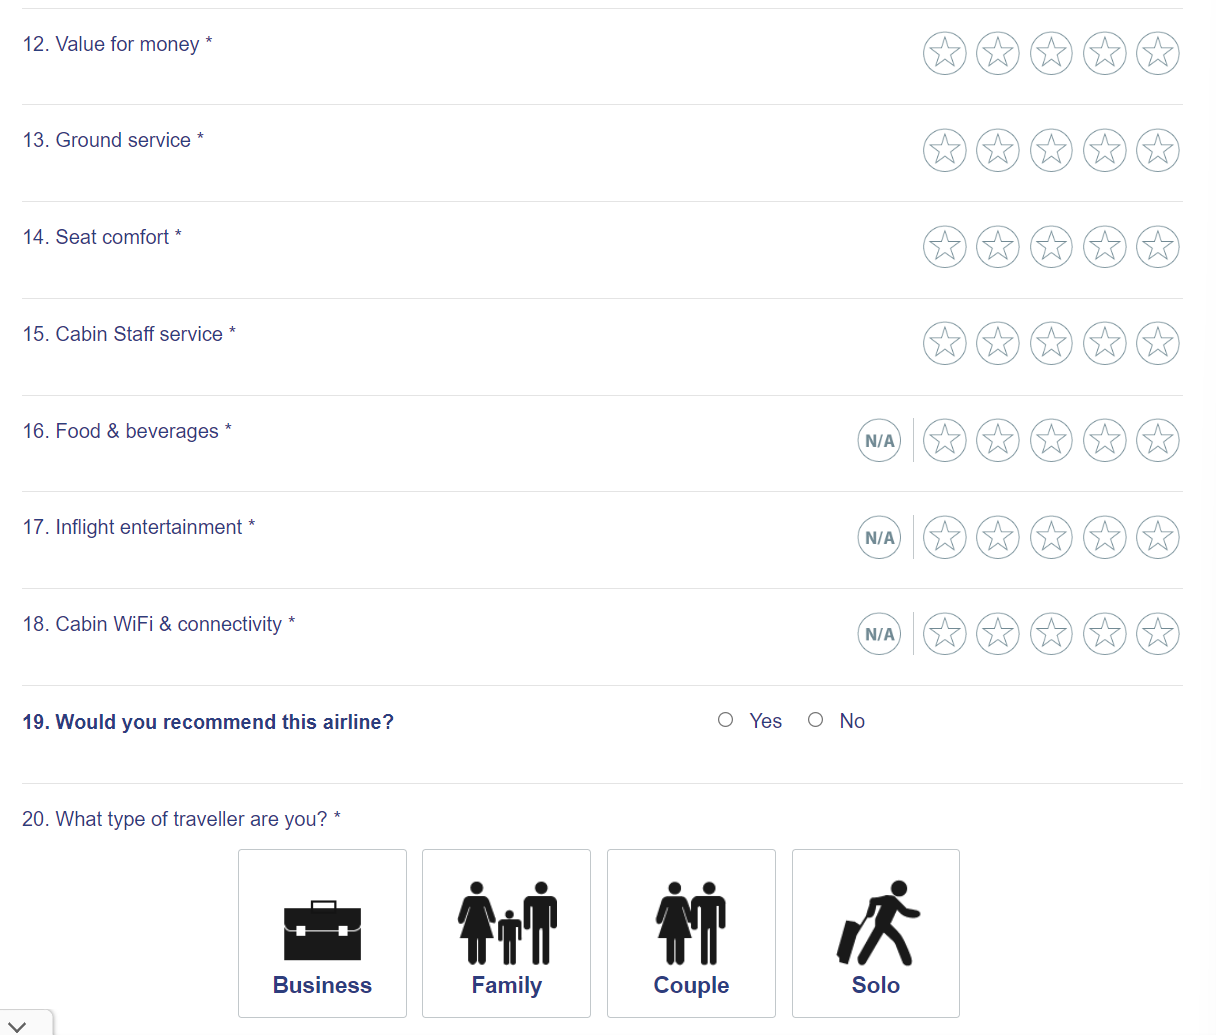



---
# Step 3: Identify Rows with Critical Fields Missing

We need to check for rows where any of the critical columns (Aircraft, Type of Traveller, Seat Type, Route, Date Flown) contain missing values.

Code Explanation:
To identify and then remove these rows, we’ll use the .dropna() function, specifying the subset of critical columns.

Here’s the code to check for missing values in those columns and remove the rows:


In [116]:
#Identifying rows with missing values in critical fields
critical_fields = ['Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown'] #Removing the qualitative fields
updated_data = df.dropna(subset=critical_fields)
updated_data

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,December 2022,1.0,1.0,1.0,3.0,1.0,NaN,1,no
1,A320,Solo Leisure,Business Class,London to Marrakech,June 2022,3.0,5.0,5.0,NaN,4.0,NaN,3,yes
2,A380,Solo Leisure,Economy Class,San Francisco to London,November 2022,2.0,1.0,2.0,2.0,3.0,1.0,2,no
3,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,3.0,NaN,3,yes
4,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,4.0,NaN,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,A321,Business,Business Class,LHR to SOF,May 2015,1.0,3.0,2.0,1.0,3.0,1.0,1,no
2646,B747,Solo Leisure,Economy Class,LHR-DEN,May 2015,3.0,5.0,4.0,2.0,NaN,NaN,4,yes
2647,777-300,Solo Leisure,Business Class,ORD-LHR,June 2015,4.0,5.0,2.0,4.0,NaN,NaN,5,yes
2648,A321,Solo Leisure,Economy Class,LHR-GLA,June 2015,4.0,5.0,3.0,NaN,NaN,NaN,4,yes


In [117]:
updated_data.isnull().sum()

,0
Aircraft,0
Type Of Traveller,0
Seat Type,0
Route,0
Date Flown,0
Seat Comfort,12
Cabin Staff Service,12
Food & Beverages,107
Inflight Entertainment,586
Ground Service,8


**Explanation:**

subset=critical_fields: This specifies that the function should only look at the selected critical columns when deciding which rows to drop.
.dropna(): This function removes rows where any of the specified columns contain NaN values.



---
# Step 4: Visualizing and Interpreting Quantitative Fields

To decide how to impute missing values in the quantitative columns, I first analyzed the distribution of the data using box plots and histograms. These visualizations helped identify whether the data was normally distributed or skewed, which informed the decision to use either the mean or median for imputation.





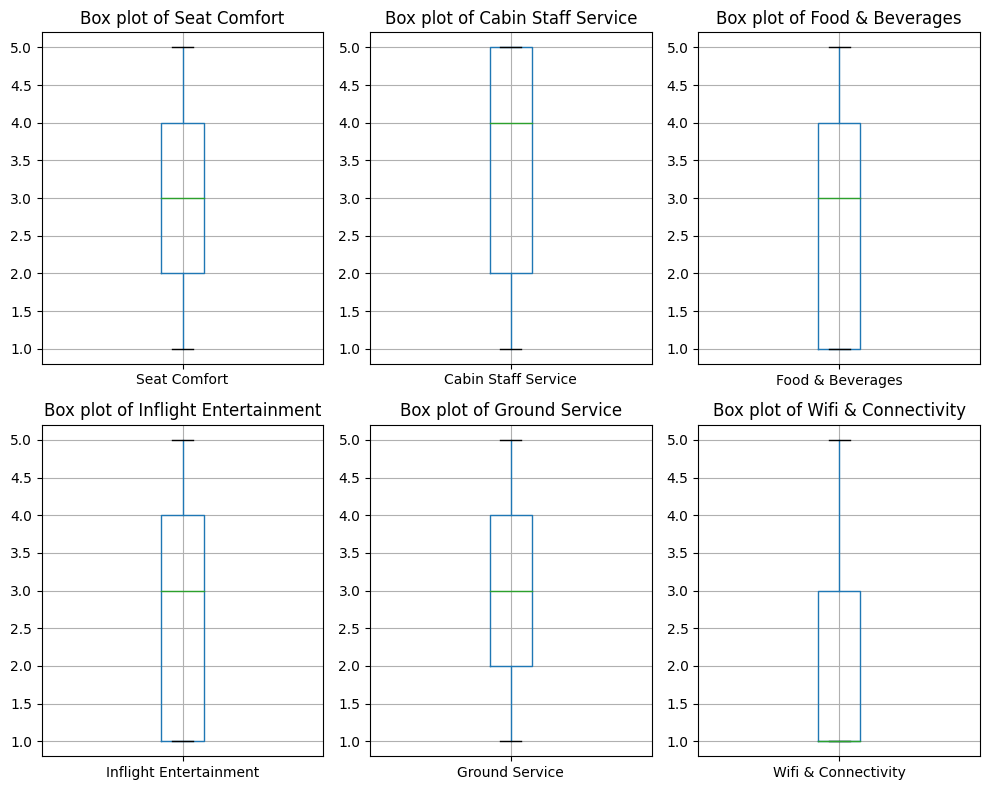

In [118]:
# List of quantitative fields
quantitative_fields = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                       'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity']

# Plot histograms for all quantitative fields
plt.figure(figsize=(10, 8))
for i, field in enumerate(quantitative_fields):
  plt.subplot(2,3,i+1)
  updated_data.boxplot(column=field)
  plt.title(f'Box plot of {field}')
plt.tight_layout()
plt.show()

**Box Plots:**

The box plots helped identify the spread of the data and check for outliers.
For most columns (Seat Comfort, Cabin Staff Service, Ground Service, etc.), there were no significant outliers, suggesting a well-behaved distribution.


---



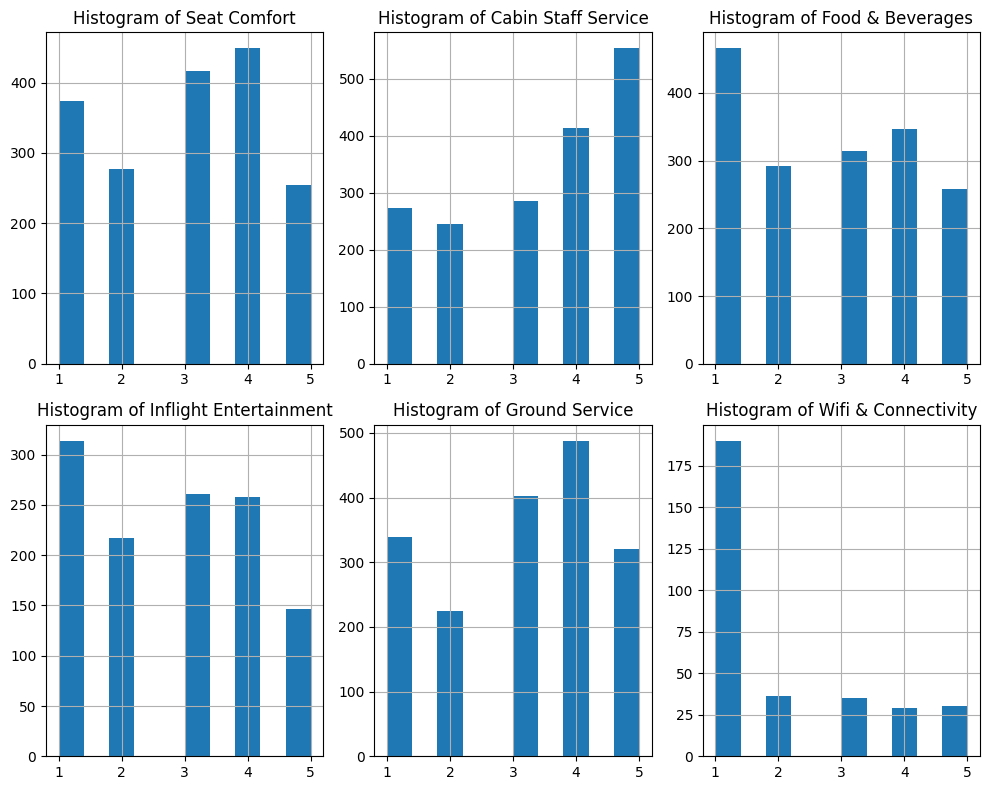

In [119]:
plt.figure(figsize=(10, 8))
for i, field in enumerate(quantitative_fields):
  plt.subplot(2,3,i+1)
  updated_data[field].hist(bins=10)
  plt.title(f'Histogram of {field}')
plt.tight_layout()
plt.show()

**Histograms:**

The histograms provided a deeper look at the shape of the data’s distribution.

*   Seat Comfort, Cabin Staff Service, Ground Service: These fields appeared normally distributed, with ratings spread fairly evenly around the middle values.
*   Wifi & Connectivity: This field was heavily skewed towards lower ratings, with many 1-star ratings. This indicates that users consistently gave low ratings in this category.






---



**Decision on Imputation:**

Mean Imputation:
The mean was used for fields where the data was relatively normally distributed, including:
*   Seat Comfort
*   Cabin Staff Service
*   Ground Service

**Reason for Not Filling NaN Values in Certain Fields**

During the data cleaning process, I chose not to fill the NaN (missing) values in specific columns, such as:


*   Food & Beverages
*   Inflight Entertainment
*   Wifi & Connectivity

**Rationale:**

In the original review form, users had the option to select "N/A" for these services if they did not use them (for example, if they did not purchase food or did not use inflight entertainment or Wi-Fi).
These fields can therefore contain legitimate null values when the service was not applicable to the user. Filling these NaN values with averages or other imputed data could distort the analysis, as it would introduce artificial values where the user intentionally left it blank.
By leaving these NaN values as they are, I preserved the integrity of the data to reflect user experiences more accurately.

In [120]:
mean_fields=['Seat Comfort', 'Cabin Staff Service','Ground Service']
filled_data = updated_data.copy()
filled_data[mean_fields] = filled_data[mean_fields].fillna(filled_data[mean_fields].mean())

In [121]:
filled_data.isnull().sum()

,0
Aircraft,0
Type Of Traveller,0
Seat Type,0
Route,0
Date Flown,0
Seat Comfort,0
Cabin Staff Service,0
Food & Beverages,107
Inflight Entertainment,586
Ground Service,0


In [122]:
filled_data

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,December 2022,1.0,1.0,1.0,3.0,1.000000,NaN,1,no
1,A320,Solo Leisure,Business Class,London to Marrakech,June 2022,3.0,5.0,5.0,NaN,4.000000,NaN,3,yes
2,A380,Solo Leisure,Economy Class,San Francisco to London,November 2022,2.0,1.0,2.0,2.0,3.000000,1.0,2,no
3,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,3.000000,NaN,3,yes
4,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,4.000000,NaN,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,A321,Business,Business Class,LHR to SOF,May 2015,1.0,3.0,2.0,1.0,3.000000,1.0,1,no
2646,B747,Solo Leisure,Economy Class,LHR-DEN,May 2015,3.0,5.0,4.0,2.0,3.126761,NaN,4,yes
2647,777-300,Solo Leisure,Business Class,ORD-LHR,June 2015,4.0,5.0,2.0,4.0,3.126761,NaN,5,yes
2648,A321,Solo Leisure,Economy Class,LHR-GLA,June 2015,4.0,5.0,3.0,NaN,3.126761,NaN,4,yes




---


# Step 5: Verifying Data Types After Imputation

After filling in the missing values, the next step is to ensure that the data types of the columns remain consistent. This is important because the process of filling missing values can sometimes change the type of the data (for example, converting numerical columns into object types). To verify that all columns have the correct data types, I used the .info() function.

In [123]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 0 to 2649
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                1783 non-null   object 
 1   Type Of Traveller       1783 non-null   object 
 2   Seat Type               1783 non-null   object 
 3   Route                   1783 non-null   object 
 4   Date Flown              1783 non-null   object 
 5   Seat Comfort            1783 non-null   float64
 6   Cabin Staff Service     1783 non-null   float64
 7   Food & Beverages        1676 non-null   float64
 8   Inflight Entertainment  1197 non-null   float64
 9   Ground Service          1783 non-null   float64
 10  Wifi & Connectivity     320 non-null    float64
 11  Value For Money         1783 non-null   int64  
 12  Recommended             1783 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 259.6+ KB


After verifying the data types of each column, I noticed a few fields that required further adjustments to ensure consistency and proper formatting:


**Value For Money:**

Initially, this column was stored as an integer (int64), while the other numerical fields were of type float64. To maintain consistency across all numerical columns, I converted Value For Money to float64.

In [124]:
filled_data['Value For Money'] = filled_data['Value For Money'].astype(float)



---


**Recommended:**

The Recommended column, which originally had values like "yes" and "no", was stored as an object (object). Since this field represents a binary decision, I converted it into a boolean (True/False) format for more efficient processing.
"

In [125]:
filled_data['Recommended'] = filled_data['Recommended'].map({'yes': True, 'no': False})



---

**Re-verified Data Types:**

After applying these conversions, I re-checked the data types using .info() to confirm the changes were applied correctly.

In [126]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 0 to 2649
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                1783 non-null   object 
 1   Type Of Traveller       1783 non-null   object 
 2   Seat Type               1783 non-null   object 
 3   Route                   1783 non-null   object 
 4   Date Flown              1783 non-null   object 
 5   Seat Comfort            1783 non-null   float64
 6   Cabin Staff Service     1783 non-null   float64
 7   Food & Beverages        1676 non-null   float64
 8   Inflight Entertainment  1197 non-null   float64
 9   Ground Service          1783 non-null   float64
 10  Wifi & Connectivity     320 non-null    float64
 11  Value For Money         1783 non-null   float64
 12  Recommended             1783 non-null   bool   
dtypes: bool(1), float64(7), object(5)
memory usage: 247.4+ KB




---

# Step 6: Check for Duplicates

To ensure the dataset is clean and free from redundant data, I checked for duplicate rows. Duplicate rows could distort the analysis by over-representing certain data points. Here's how I identified and removed them.

Steps Taken:

*   Identified Duplicate Rows: I used the .duplicated() function to identify rows where all the columns had identical values.

In [127]:
duplicates = filled_data.duplicated()

In [128]:
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 4


Outcome: The output revealed that there were 4 duplicate rows in the dataset

---

*   Printed the Duplicate Rows: I printed the actual rows that were flagged as duplicates to inspect their content and confirm they were indeed duplicates.



In [129]:
filled_data[duplicates]

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
2081,Boeing 777,Couple Leisure,Economy Class,PHL to LHR,March 2016,1.0,5.0,1.0,3.0,3.0,NaN,1.0,False
2283,Boeing 777,Couple Leisure,Business Class,Tampa to Gatwick,November 2015,4.0,4.0,3.0,2.0,3.0,NaN,4.0,True
2285,Boeing 747-400,Couple Leisure,Premium Economy,LHR to MIA,November 2015,4.0,3.0,3.0,2.0,3.0,NaN,3.0,True
2579,Boeing 777,Couple Leisure,Business Class,Orlando to London,May 2015,5.0,5.0,4.0,4.0,5.0,NaN,5.0,True




---
*   Removed the Duplicate Rows: I removed the duplicate rows using the .drop_duplicates() function, which ensures each review is unique in the dataset. After removing the duplicates, I re-checked the dataset to confirm that no duplicate rows remain.



In [130]:
filled_data = filled_data.drop_duplicates()

In [131]:
test = filled_data.duplicated()
print(f"Number of duplicate rows: {test.sum()}")

Number of duplicate rows: 0


In [132]:
filled_data.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,December 2022,1.0,1.0,1.0,3.0,1.0,NaN,1.0,False
1,A320,Solo Leisure,Business Class,London to Marrakech,June 2022,3.0,5.0,5.0,NaN,4.0,NaN,3.0,True
2,A380,Solo Leisure,Economy Class,San Francisco to London,November 2022,2.0,1.0,2.0,2.0,3.0,1.0,2.0,False
3,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,3.0,NaN,3.0,True
4,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,4.0,NaN,4.0,True




---
# Step 7: Final Data Validation and Consistency Checks


## **Handling Rows Containing "via" in the Route**

As part of the final validation, I identified rows where the Route column contained the word "via." The reason for this is that rows with "via" in the route description (e.g., "Montreal to Edinburgh via London Heathrow") are ambiguous because they don't clearly specify which flight the passenger gave the ratings for—whether it’s the first leg, the second leg, or the entire journey.

**Action Taken:**
*   I chose to remove these rows to maintain data clarity and ensure that the ratings reflect only one segment of a flight, rather than a combination of multiple segments.




In [133]:
# Find rows where the Route contains the word 'via'
via_rows = filled_data[filled_data['Route'].str.contains('via', case=False, na=False)]
# Display the rows that contain 'via' in the Route
via_rows

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
4,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,4.0,NaN,4.0,True
20,A380,Solo Leisure,Business Class,Madrid to San Francisco via London,September 2022,3.0,1.0,1.0,4.0,3.0,NaN,1.0,False
73,"A320, Boeing 787",Solo Leisure,Premium Economy,Venice to Baltimore via London Heathrow,July 2022,3.0,3.0,3.0,2.0,1.0,1.0,2.0,False
117,Boeing 777,Solo Leisure,Premium Economy,Dubai to Milan Malpensa via London,May 2022,5.0,5.0,5.0,5.0,5.0,3.0,5.0,True
126,A320,Couple Leisure,Economy Class,Gothenburg to Manchester via London,April 2022,3.0,3.0,1.0,NaN,1.0,1.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,B777-300 / A319,Solo Leisure,Economy Class,Chicago to Berlin via London Heathrow,June 2015,1.0,2.0,1.0,3.0,1.0,NaN,1.0,False
2618,Boeing 777-200,Family Leisure,Economy Class,YUL to FCO via LHR,October 2014,4.0,4.0,3.0,3.0,4.0,NaN,5.0,True
2620,A320 / Boeing 777-300,Solo Leisure,Economy Class,Berlin to Chicago via LHR,June 2015,1.0,3.0,2.0,3.0,1.0,NaN,1.0,False
2624,Boeing 767,Couple Leisure,Business Class,LHR to Grand Cayman via Nassau,June 2015,2.0,5.0,2.0,2.0,2.0,NaN,2.0,False


### **Creating main_data DataFrame**

As the final step in the data cleaning process, I created a new DataFrame called main_data. This was a personal choice to separate the cleaned and validated data (filled_data) from the final dataset that will be used for analysis or modeling.

By making a copy of the cleaned data, I can continue to apply further transformations or analysis to main_data without affecting the original dataset (filled_data), which preserves the raw, cleaned data for reference.

In [134]:
main_data = filled_data.copy()
main_data.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,December 2022,1.0,1.0,1.0,3.0,1.0,NaN,1.0,False
1,A320,Solo Leisure,Business Class,London to Marrakech,June 2022,3.0,5.0,5.0,NaN,4.0,NaN,3.0,True
2,A380,Solo Leisure,Economy Class,San Francisco to London,November 2022,2.0,1.0,2.0,2.0,3.0,1.0,2.0,False
3,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,3.0,NaN,3.0,True
4,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,4.0,NaN,4.0,True


### **Dropping Rows with "via" in the Route**

In this step, I aimed to remove all rows from the main_data DataFrame where the Route column contained the word "via." These rows were dropped because the ambiguity introduced by the "via" keyword (e.g., "Montreal to Edinburgh via London Heathrow") made it unclear which segment of the flight the passenger was rating. To ensure data accuracy, it was essential to remove these rows.

**Steps Taken:**
*   Extracted Indexes: I used the .index of the via_rows DataFrame to get a list of indexes where "via" appeared in the Route.
*   Dropped the Rows: I used .drop() to remove these rows from the main_data DataFrame.





In [135]:
via_index = via_rows.index.tolist()
main_data.drop(via_index, inplace=True)
main_data

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,December 2022,1.0,1.0,1.0,3.0,1.000000,NaN,1.0,False
1,A320,Solo Leisure,Business Class,London to Marrakech,June 2022,3.0,5.0,5.0,NaN,4.000000,NaN,3.0,True
2,A380,Solo Leisure,Economy Class,San Francisco to London,November 2022,2.0,1.0,2.0,2.0,3.000000,1.0,2.0,False
3,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,3.000000,NaN,3.0,True
8,Boeing 777,Solo Leisure,Business Class,London to Cape Town,November 2022,4.0,2.0,1.0,4.0,1.000000,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,A321,Business,Business Class,LHR to SOF,May 2015,1.0,3.0,2.0,1.0,3.000000,1.0,1.0,False
2646,B747,Solo Leisure,Economy Class,LHR-DEN,May 2015,3.0,5.0,4.0,2.0,3.126761,NaN,4.0,True
2647,777-300,Solo Leisure,Business Class,ORD-LHR,June 2015,4.0,5.0,2.0,4.0,3.126761,NaN,5.0,True
2648,A321,Solo Leisure,Economy Class,LHR-GLA,June 2015,4.0,5.0,3.0,NaN,3.126761,NaN,4.0,True


## **Splitting the Route into Departure and Destination Cities**

In this step, I created a function to split the Route column into two parts: Departure and Destination. The goal was to extract the cities involved in the route and store them in separate columns for easier analysis.

I accounted for routes written in different formats:
*   Routes written as "City1 to City2" were split using " to " as the delimiter.
*   Routes written as "City1 - City2" (with a hyphen) were split using "-".

Steps Taken:

1.   Created a Custom Function:
    *   I defined a function called conditional_split() to handle different route formats and split the route string accordingly.
2.   Applied the Function:
  *   I applied this function to the Route column to generate a list of the departure and destination cities for each route.
3.   Added Columns:
  *   I inserted two new columns, Departure and Destination, into the main_data DataFrame to store the split values.
4.   Reset Index:
  *   To maintain a clean and orderly DataFrame, I reset the index to ensure proper row alignment after adding the new columns.

















In [136]:
def conditional_split(string):
  if "to" in string:
    return string.split(' to ')
  else:
    return string.split('-')

initial_list=list(main_data['Route'].apply(conditional_split))
initial_list[:10]

[['Denver', 'London'],
 ['London', 'Marrakech'],
 ['San Francisco', 'London'],
 ['London', 'Lisbon'],
 ['London', 'Cape Town'],
 ['Baltimore', 'London Heathrow'],
 ['London Heathrow', 'Gibraltar'],
 ['London Heathrow', 'Nairobi'],
 ['London', 'Los Angeles'],
 ['Copenhagen', 'Heathrow']]

In [137]:
main_data.insert(4,"Departure", "")
main_data.insert(5,"Destination","")

main_data = main_data.reset_index(drop=True)


In [138]:
main_data

,Aircraft,Type Of Traveller,Seat Type,Route,Departure,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,,,December 2022,1.0,1.0,1.0,3.0,1.000000,NaN,1.0,False
1,A320,Solo Leisure,Business Class,London to Marrakech,,,June 2022,3.0,5.0,5.0,NaN,4.000000,NaN,3.0,True
2,A380,Solo Leisure,Economy Class,San Francisco to London,,,November 2022,2.0,1.0,2.0,2.0,3.000000,1.0,2.0,False
3,A320,Solo Leisure,Business Class,London to Lisbon,,,November 2022,3.0,4.0,4.0,NaN,3.000000,NaN,3.0,True
4,Boeing 777,Solo Leisure,Business Class,London to Cape Town,,,November 2022,4.0,2.0,1.0,4.0,1.000000,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,A321,Business,Business Class,LHR to SOF,,,May 2015,1.0,3.0,2.0,1.0,3.000000,1.0,1.0,False
1512,B747,Solo Leisure,Economy Class,LHR-DEN,,,May 2015,3.0,5.0,4.0,2.0,3.126761,NaN,4.0,True
1513,777-300,Solo Leisure,Business Class,ORD-LHR,,,June 2015,4.0,5.0,2.0,4.0,3.126761,NaN,5.0,True
1514,A321,Solo Leisure,Economy Class,LHR-GLA,,,June 2015,4.0,5.0,3.0,NaN,3.126761,NaN,4.0,True


### **Filling Departure and Destination Columns & Creating Lists**

After splitting the Route column into Departure and Destination, I populated these new columns with the extracted city names from the initial_list. In the dataset, however, some entries contained IATA airport codes rather than city names. To address this issue, I created two separate lists (departure_list and destination_list) for easier manipulation and handling of IATA codes.

**Steps Taken:**


1.   Filled the Departure and Destination Columns:
  *   I looped through the initial_list (which contained the split values from the Route column) and assigned the first value to the Departure column and the second value to the Destination column.

2.   Created Lists for Further Processing:
  *   I then created two lists, departure_list and destination_list, to store the values from the Departure and Destination columns. This allowed me to handle cases where the dataset contained IATA codes instead of city names more efficiently in the following steps.

Outcome:
*   The Departure and Destination columns were successfully populated with the city names (or IATA codes) extracted from the Route column.
*   Two lists, departure_list and destination_list, were created to handle further code processing where IATA codes needed to be mapped or replaced.





In [139]:
for i in range(len(initial_list)):
  main_data["Departure"][i] = initial_list[i][0]
  main_data["Destination"][i] = initial_list[i][1]
main_data

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  main_data["Destination"][i] = initial_list[i][1]
<ipython-input-139-017f352f066e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data["Destination"][i] = initial_list[i][1]
<ipython-input-139-017f352f066e>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A 

,Aircraft,Type Of Traveller,Seat Type,Route,Departure,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,Denver,London,December 2022,1.0,1.0,1.0,3.0,1.000000,NaN,1.0,False
1,A320,Solo Leisure,Business Class,London to Marrakech,London,Marrakech,June 2022,3.0,5.0,5.0,NaN,4.000000,NaN,3.0,True
2,A380,Solo Leisure,Economy Class,San Francisco to London,San Francisco,London,November 2022,2.0,1.0,2.0,2.0,3.000000,1.0,2.0,False
3,A320,Solo Leisure,Business Class,London to Lisbon,London,Lisbon,November 2022,3.0,4.0,4.0,NaN,3.000000,NaN,3.0,True
4,Boeing 777,Solo Leisure,Business Class,London to Cape Town,London,Cape Town,November 2022,4.0,2.0,1.0,4.0,1.000000,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,A321,Business,Business Class,LHR to SOF,LHR,SOF,May 2015,1.0,3.0,2.0,1.0,3.000000,1.0,1.0,False
1512,B747,Solo Leisure,Economy Class,LHR-DEN,LHR,DEN,May 2015,3.0,5.0,4.0,2.0,3.126761,NaN,4.0,True
1513,777-300,Solo Leisure,Business Class,ORD-LHR,ORD,LHR,June 2015,4.0,5.0,2.0,4.0,3.126761,NaN,5.0,True
1514,A321,Solo Leisure,Economy Class,LHR-GLA,LHR,GLA,June 2015,4.0,5.0,3.0,NaN,3.126761,NaN,4.0,True


In [140]:
departure_list = list(main_data["Departure"])
destination_list = list(main_data["Destination"])

In [141]:
main_data

,Aircraft,Type Of Traveller,Seat Type,Route,Departure,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,Denver,London,December 2022,1.0,1.0,1.0,3.0,1.000000,NaN,1.0,False
1,A320,Solo Leisure,Business Class,London to Marrakech,London,Marrakech,June 2022,3.0,5.0,5.0,NaN,4.000000,NaN,3.0,True
2,A380,Solo Leisure,Economy Class,San Francisco to London,San Francisco,London,November 2022,2.0,1.0,2.0,2.0,3.000000,1.0,2.0,False
3,A320,Solo Leisure,Business Class,London to Lisbon,London,Lisbon,November 2022,3.0,4.0,4.0,NaN,3.000000,NaN,3.0,True
4,Boeing 777,Solo Leisure,Business Class,London to Cape Town,London,Cape Town,November 2022,4.0,2.0,1.0,4.0,1.000000,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,A321,Business,Business Class,LHR to SOF,LHR,SOF,May 2015,1.0,3.0,2.0,1.0,3.000000,1.0,1.0,False
1512,B747,Solo Leisure,Economy Class,LHR-DEN,LHR,DEN,May 2015,3.0,5.0,4.0,2.0,3.126761,NaN,4.0,True
1513,777-300,Solo Leisure,Business Class,ORD-LHR,ORD,LHR,June 2015,4.0,5.0,2.0,4.0,3.126761,NaN,5.0,True
1514,A321,Solo Leisure,Economy Class,LHR-GLA,LHR,GLA,June 2015,4.0,5.0,3.0,NaN,3.126761,NaN,4.0,True


## **Replacing IATA Codes with City Names**

In this step, I replaced the IATA airport codes found in the Departure and Destination columns with the corresponding city names. To achieve this, I utilized a pre-existing dictionary, airports, which maps IATA codes to city names.

**Steps Taken:**


1.   Loaded the Airports Data:
  *   I loaded the airport data, ensuring that each IATA code was correctly mapped to its corresponding city name. This data was structured as a dictionary, with the IATA codes as keys and their respective city names as values.
2.   Created a Function to Replace IATA Codes:
  *  I created the airport_to_city() function that checks whether a value (in the Departure and Destination columns) exists as an IATA code in the airports dictionary. If the value exists, it is replaced with the corresponding city name. Otherwise, the original value is retained.

In [142]:
def airport_to_city(string):
  if string in airports.keys():
    return airports[string]['city']
  else:
    return string

Applied the Function to the Data:

I then applied this function to the Departure and Destination columns of the dataset to replace any IATA codes with the corresponding city names.

In [143]:
main_data["Departure"] = main_data["Departure"].apply(airport_to_city)
main_data["Destination"] = main_data["Destination"].apply(airport_to_city)
main_data

,Aircraft,Type Of Traveller,Seat Type,Route,Departure,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,Denver,London,December 2022,1.0,1.0,1.0,3.0,1.000000,NaN,1.0,False
1,A320,Solo Leisure,Business Class,London to Marrakech,London,Marrakech,June 2022,3.0,5.0,5.0,NaN,4.000000,NaN,3.0,True
2,A380,Solo Leisure,Economy Class,San Francisco to London,San Francisco,London,November 2022,2.0,1.0,2.0,2.0,3.000000,1.0,2.0,False
3,A320,Solo Leisure,Business Class,London to Lisbon,London,Lisbon,November 2022,3.0,4.0,4.0,NaN,3.000000,NaN,3.0,True
4,Boeing 777,Solo Leisure,Business Class,London to Cape Town,London,Cape Town,November 2022,4.0,2.0,1.0,4.0,1.000000,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,A321,Business,Business Class,LHR to SOF,London,Sofia,May 2015,1.0,3.0,2.0,1.0,3.000000,1.0,1.0,False
1512,B747,Solo Leisure,Economy Class,LHR-DEN,London,Denver,May 2015,3.0,5.0,4.0,2.0,3.126761,NaN,4.0,True
1513,777-300,Solo Leisure,Business Class,ORD-LHR,Chicago,London,June 2015,4.0,5.0,2.0,4.0,3.126761,NaN,5.0,True
1514,A321,Solo Leisure,Economy Class,LHR-GLA,London,Glasgow,June 2015,4.0,5.0,3.0,NaN,3.126761,NaN,4.0,True


**Outcome:**
I successfully replaced all IATA codes in the Departure and Destination columns with their corresponding city names. This made the data more consistent and easier to interpret.



---



## **Using a Dataset for City and Country Names**

To handle city and country name mapping more efficiently, I used a dataset of world cities obtained from [SimpleMaps](https://simplemaps.com/data/world-cities). This dataset includes details like city names, their corresponding countries, geographic coordinates, and other useful information.


1.   Steps Taken:
    *   Loaded the Dataset: I imported the dataset using pandas and loaded it into a DataFrame to access city and country names for further processing.







In [144]:
worldcities = pd.read_csv("/content/drive/MyDrive/British Airways Review Project/worldcities.csv")
worldcities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
47863,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139


2.   Extracted and Cleaned the Data:
    *   I focused on the city_ascii (city name) and country columns. To ensure data consistency, I dropped any rows containing missing values in these columns.

In [145]:
ch_cities = worldcities['city_ascii']
ch_countries = worldcities['country']
ch_cities = ch_cities.dropna()
ch_countries = ch_countries.dropna()

In [146]:
ch_cities.isna().sum()

0

In [147]:
ch_countries.isna().sum()

0

## Cleaning City and Country Names Using Regular Expressions (Regex)

After loading the city and country data, I applied a regex (regular expression) technique to clean and standardize the Departure and Destination columns in the dataset. This process helped ensure that any city or country name variations were handled effectively.

Steps Taken:

1.  ** Data Preprocessing:** First, I converted the city and country names from both the dataset (ch_cities_lower and ch_countries_lower) and the main_data DataFrame to lowercase. This normalization ensured that the matching process would be case-insensitive.

2.   **Created Regex Patterns for Matching:** I created two regex patterns:
    *   One for matching city names (city_pattern).
    *   Another for matching country names (country_pattern).

    These patterns were dynamically generated by combining all city and country names into a single pattern using the "|" (OR) operator.

2.   Function to Clean City or Country Names:
    *   I defined a function, correct_city_or_country_regex(), that took a location name and tried to match it against the city or country patterns.
    *   The function first checks if the location_name matches a city. If a match is found, it returns the matched city name.
    *   If no city match is found, the function checks for a country match and returns the country if a match is found.
    *   If neither a city nor country match is found, the original location_name is returned unchanged.
2.   Applied the Function to the Departure and Destination Columns:
    *   I applied the correct_city_or_country_regex() function to both the Departure and Destination columns using the .apply() method, which replaced any matched IATA codes or other uncleaned data with the correct city or country name.


In [148]:
# Preprocess the data: lowercase for normalization
ch_cities_lower = ch_cities.str.lower().tolist()
ch_countries_lower = ch_countries.str.lower().tolist()
main_data['Departure'] = main_data['Departure'].str.lower()
main_data['Destination'] = main_data['Destination'].str.lower()

# Create a regex pattern for cities and countries by joining them with "|"
city_pattern = r'\b(?:' + '|'.join(re.escape(city) for city in ch_cities_lower) + r')\b'
country_pattern = r'\b(?:' + '|'.join(re.escape(country) for country in ch_countries_lower) + r')\b'

# Function to clean the city or country name based on regex match
def correct_city_or_country_regex(location_name, city_pattern, country_pattern):
    # Check if any part of the location name matches a city
    city_match = re.search(city_pattern, location_name)
    if city_match:
        return city_match.group(0)  # Return the matched city

    # If no city match, check for a country match
    country_match = re.search(country_pattern, location_name)
    if country_match:
        return country_match.group(0)  # Return the matched country

    # If no match is found, return the original location name
    return location_name

# Clean the Departure and Destination columns
main_data['Departure'] = main_data['Departure'].apply(lambda x: correct_city_or_country_regex(x, city_pattern, country_pattern))
main_data['Destination'] = main_data['Destination'].apply(lambda x: correct_city_or_country_regex(x, city_pattern, country_pattern))

# Display the cleaned dataframe
main_data

,Aircraft,Type Of Traveller,Seat Type,Route,Departure,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,denver,london,December 2022,1.0,1.0,1.0,3.0,1.000000,NaN,1.0,False
1,A320,Solo Leisure,Business Class,London to Marrakech,london,marrakech,June 2022,3.0,5.0,5.0,NaN,4.000000,NaN,3.0,True
2,A380,Solo Leisure,Economy Class,San Francisco to London,san francisco,london,November 2022,2.0,1.0,2.0,2.0,3.000000,1.0,2.0,False
3,A320,Solo Leisure,Business Class,London to Lisbon,london,lisbon,November 2022,3.0,4.0,4.0,NaN,3.000000,NaN,3.0,True
4,Boeing 777,Solo Leisure,Business Class,London to Cape Town,london,cape town,November 2022,4.0,2.0,1.0,4.0,1.000000,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,A321,Business,Business Class,LHR to SOF,london,sofia,May 2015,1.0,3.0,2.0,1.0,3.000000,1.0,1.0,False
1512,B747,Solo Leisure,Economy Class,LHR-DEN,london,denver,May 2015,3.0,5.0,4.0,2.0,3.126761,NaN,4.0,True
1513,777-300,Solo Leisure,Business Class,ORD-LHR,chicago,london,June 2015,4.0,5.0,2.0,4.0,3.126761,NaN,5.0,True
1514,A321,Solo Leisure,Economy Class,LHR-GLA,london,glasgow,June 2015,4.0,5.0,3.0,NaN,3.126761,NaN,4.0,True


**Data Cleaning Process**

After initially cleaning the dataset using Python, I aimed to make sure that the Departure and Destination columns were fully consistent. I wrote several functions to handle common issues like mismatched city and airport names, spelling mistakes, and encoding problems (such as accented characters). However, due to the complexity and variability of user-generated data, I decided to conduct a final manual review to ensure no inconsistencies remained. Here are the steps I followed to clean the data in Excel:



1.   **Manual Verification:**
I first ran automated Python scripts that used regular expressions and fuzzy matching algorithms to correct common problems. For instance, cities like "london" were corrected across various columns regardless of whether an airport (like "Heathrow" or "Gatwick") was listed. However, I realized that some human-entered errors persisted, so I manually verified specific entries in Excel to ensure consistency across all rows.

1.   **Find and Replace:** I used Excel’s "Find and Replace" functionality to correct several city names and remove encoding issues. This allowed me to standardize certain values that Python’s automated tools may have missed. Specifically:
    *   I replaced all instances of "heathrow" and "gatwick" with "london" to ensure consistency for the London area.
    *   I also corrected spelling and encoding issues for cities like "dÃ¼sseldorf" (changed to "dusseldorf") and "krakÃ³w" (changed to "krakow"), which were likely due to character encoding problems during data entry.


3.   **Ensuring City and Country Consistency:** Additionally, I made sure to standardize cities with multiple airports or variations in naming conventions. For example:
    *   "luqa" was replaced with "malta" since Luqa is the location of Malta’s main airport.
    *   "malÃ©" was changed to "velana" to reflect the correct city and airport names in the Maldives.
    *   I also updated entries like "mississauga" and "richmond," which were changed to "toronto" and "vancouver," respectively, to represent the greater metropolitan areas.

4.   **Exporting and Inspecting Data:** Once the data cleaning was complete, I used the following code to export the cleaned dataset:

In [149]:
main_data.to_csv("airport_unclean.csv")


5.   Table of Manual Changes:
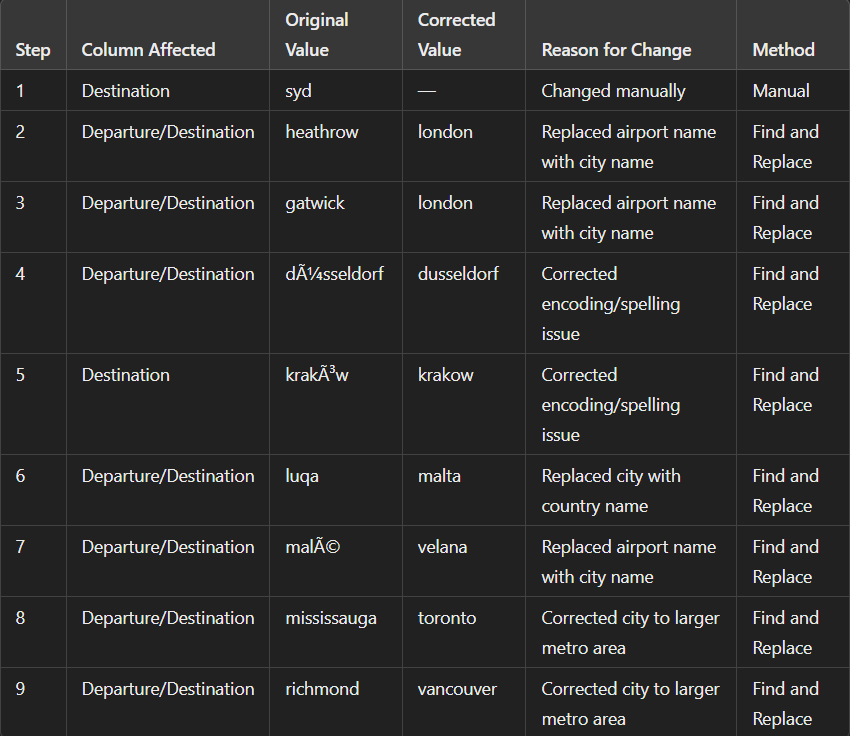


6.   **Moving to Date Cleaning:** After ensuring consistency in the Departure and Destination columns, I moved on to cleaning the Date Flown column. This involved standardizing date formats across all rows and ensuring no missing or incorrect values were present.

7.   **Re-importing Cleaned Data:** Finally, to continue working with the cleaned data, I used the following code to re-import the dataset:


In [150]:
main_data = pd.read_csv("/content/drive/MyDrive/British Airways Review Project/airport_clean.csv")
main_data

,Unnamed: 0,Aircraft,Type Of Traveller,Seat Type,Route,Departure,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,0,Boeing 787-9,Business,Economy Class,Denver to London,denver,london,Dec-22,1.0,1.0,1.0,3.0,1.0,NaN,1,False
1,4,Boeing 777,Solo Leisure,Business Class,London to Cape Town,london,cape town,Nov-22,4.0,2.0,1.0,4.0,1.0,NaN,1,False
2,3,A320,Solo Leisure,Business Class,London to Lisbon,london,lisbon,Nov-22,3.0,4.0,4.0,NaN,3.0,NaN,3,True
3,2,A380,Solo Leisure,Economy Class,San Francisco to London,san francisco,london,Nov-22,2.0,1.0,2.0,2.0,3.0,1.0,2,False
4,5,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,baltimore,london,Nov-22,1.0,3.0,3.0,1.0,2.0,NaN,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1227,Boeing 747,Solo Leisure,Business Class,CPT to LHR,cape town,london,Feb-15,4.0,3.0,4.0,4.0,4.0,NaN,4,True
1512,1318,Boeing 777-300ER,Business,Business Class,Tokyo Narita to LHR,tokyo,london,Jan-15,4.0,3.0,2.0,3.0,4.0,NaN,4,True
1513,1319,Boeing 777-300ER,Business,First Class,LHR to Tokyo Narita,london,tokyo,Jan-15,5.0,5.0,5.0,5.0,4.0,NaN,5,True
1514,1480,A320,Solo Leisure,Business Class,Tel Aviv to London LHR,tel aviv,london,Dec-14,5.0,5.0,5.0,4.0,5.0,NaN,4,True




6.   Dropped the Route Column:
    *   After successfully extracting and cleaning the city names, I no longer needed the original Route column, so I dropped it from the DataFrame.









In [151]:
main_data.drop(columns=["Route","Unnamed: 0"], inplace=True)

In [152]:
main_data.head()

,Aircraft,Type Of Traveller,Seat Type,Departure,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,denver,london,Dec-22,1.0,1.0,1.0,3.0,1.0,NaN,1,False
1,Boeing 777,Solo Leisure,Business Class,london,cape town,Nov-22,4.0,2.0,1.0,4.0,1.0,NaN,1,False
2,A320,Solo Leisure,Business Class,london,lisbon,Nov-22,3.0,4.0,4.0,NaN,3.0,NaN,3,True
3,A380,Solo Leisure,Economy Class,san francisco,london,Nov-22,2.0,1.0,2.0,2.0,3.0,1.0,2,False
4,Boeing 787-8,Solo Leisure,Economy Class,baltimore,london,Nov-22,1.0,3.0,3.0,1.0,2.0,NaN,3,True


Handling the Date Flown Column

To better organize the Date Flown information, I decided to split the date (which was originally in the format "Month Year" like "May 2023") into two separate columns: Month and Year. This separation makes it easier to analyze trends based on either the month or the year of the flight.

Steps Taken:
1.   Extracted the Date Flown Column:
    *   I first extracted the Date Flown column into a list called date_flown for easier manipulation.
2.   Split the Dates into Month and Year:
    *   Using list comprehension, I split each entry in the date_flown list into two parts: Month and Year. The .split('-') function was used to split the date strings based on the space between the month and year.
3.   Added New Columns:
    *   I inserted two new columns, Month and Year, into the main_data DataFrame to hold the separated values.
4.   Populated the New Columns:
    *   I looped through the new_date_flown list (which contained the split date values) and populated the new Month and Year columns with the corresponding values.
5.   Dropped the Original Date Flown Column:
    *   After successfully creating the Month and Year columns, I dropped the original Date Flown column since it was no longer needed.





















In [153]:
date_flown = list(main_data["Date Flown"])
new_date_flown = [date.split('-') for date in date_flown]

In [154]:
main_data.insert(5,"Month","")
main_data.insert(6,"Year","")

In [155]:
for i in range(len(new_date_flown)):
  main_data["Month"][i] = new_date_flown[i][0]
  main_data["Year"][i] = new_date_flown[i][1]
main_data.head()

Streaming output truncated to the last 5000 lines.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  main_data["Month"][i] = new_date_flown[i][0]
<ipython-input-155-7ce420efdccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data["Month"][i] = new_date_flown[i][0]
<ipython-input-155-7ce420efdccb>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical

,Aircraft,Type Of Traveller,Seat Type,Departure,Destination,Month,Year,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,denver,london,Dec,22,Dec-22,1.0,1.0,1.0,3.0,1.0,NaN,1,False
1,Boeing 777,Solo Leisure,Business Class,london,cape town,Nov,22,Nov-22,4.0,2.0,1.0,4.0,1.0,NaN,1,False
2,A320,Solo Leisure,Business Class,london,lisbon,Nov,22,Nov-22,3.0,4.0,4.0,NaN,3.0,NaN,3,True
3,A380,Solo Leisure,Economy Class,san francisco,london,Nov,22,Nov-22,2.0,1.0,2.0,2.0,3.0,1.0,2,False
4,Boeing 787-8,Solo Leisure,Economy Class,baltimore,london,Nov,22,Nov-22,1.0,3.0,3.0,1.0,2.0,NaN,3,True


In [156]:
main_data.drop(columns="Date Flown", inplace=True)
main_data

,Aircraft,Type Of Traveller,Seat Type,Departure,Destination,Month,Year,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,denver,london,Dec,22,1.0,1.0,1.0,3.0,1.0,NaN,1,False
1,Boeing 777,Solo Leisure,Business Class,london,cape town,Nov,22,4.0,2.0,1.0,4.0,1.0,NaN,1,False
2,A320,Solo Leisure,Business Class,london,lisbon,Nov,22,3.0,4.0,4.0,NaN,3.0,NaN,3,True
3,A380,Solo Leisure,Economy Class,san francisco,london,Nov,22,2.0,1.0,2.0,2.0,3.0,1.0,2,False
4,Boeing 787-8,Solo Leisure,Economy Class,baltimore,london,Nov,22,1.0,3.0,3.0,1.0,2.0,NaN,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,Boeing 747,Solo Leisure,Business Class,cape town,london,Feb,15,4.0,3.0,4.0,4.0,4.0,NaN,4,True
1512,Boeing 777-300ER,Business,Business Class,tokyo,london,Jan,15,4.0,3.0,2.0,3.0,4.0,NaN,4,True
1513,Boeing 777-300ER,Business,First Class,london,tokyo,Jan,15,5.0,5.0,5.0,5.0,4.0,NaN,5,True
1514,A320,Solo Leisure,Business Class,tel aviv,london,Dec,14,5.0,5.0,5.0,4.0,5.0,NaN,4,True


In [158]:
main_data['Year'] = main_data['Year'].astype(int)

In [162]:
main_data['Year'] = main_data['Year'] + 2000

In [163]:
main_data['Year'] = pd.to_datetime(main_data['Year'], format='%Y')

In [165]:
main_data['Year'] = main_data['Year'].dt.year

In [166]:
main_data

,Aircraft,Type Of Traveller,Seat Type,Departure,Destination,Month,Year,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,denver,london,Dec,2022,1.0,1.0,1.0,3.0,1.0,NaN,1,False
1,Boeing 777,Solo Leisure,Business Class,london,cape town,Nov,2022,4.0,2.0,1.0,4.0,1.0,NaN,1,False
2,A320,Solo Leisure,Business Class,london,lisbon,Nov,2022,3.0,4.0,4.0,NaN,3.0,NaN,3,True
3,A380,Solo Leisure,Economy Class,san francisco,london,Nov,2022,2.0,1.0,2.0,2.0,3.0,1.0,2,False
4,Boeing 787-8,Solo Leisure,Economy Class,baltimore,london,Nov,2022,1.0,3.0,3.0,1.0,2.0,NaN,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,Boeing 747,Solo Leisure,Business Class,cape town,london,Feb,2015,4.0,3.0,4.0,4.0,4.0,NaN,4,True
1512,Boeing 777-300ER,Business,Business Class,tokyo,london,Jan,2015,4.0,3.0,2.0,3.0,4.0,NaN,4,True
1513,Boeing 777-300ER,Business,First Class,london,tokyo,Jan,2015,5.0,5.0,5.0,5.0,4.0,NaN,5,True
1514,A320,Solo Leisure,Business Class,tel aviv,london,Dec,2014,5.0,5.0,5.0,4.0,5.0,NaN,4,True


# Final Summary: Data Cleaning and Preparation Process

In this project, I undertook a thorough data cleaning process to prepare the dataset for further analysis. The dataset contained user reviews and ratings related to various flights, with fields such as Route, Aircraft, Seat Comfort, and more. Here’s a summary of the key steps I followed to clean and prepare the data:

1. Handling Missing Values:
I identified missing values in the dataset and filled them where appropriate:
For columns like Seat Comfort, Cabin Staff Service, and Ground Service, I filled missing values with the mean to ensure consistency.
For fields like Food & Beverages, Inflight Entertainment, and Wifi & Connectivity, where "N/A" was a legitimate response, I left NaN values as they were.
2. Data Type Adjustments:
I adjusted the data types of specific columns:
Converted Recommended from an object (strings "yes" and "no") to a boolean field (True for "yes" and False for "no").
Converted Value for Money to a float to maintain consistency with other numerical fields.
3. Removing Duplicates:
I identified and removed duplicate rows to ensure the dataset contained only unique entries.
4. Handling Route Data:
I removed rows where the Route column contained the word "via" because it was unclear which flight segment the ratings applied to.
I split the Route column into Departure and Destination cities for easier analysis.
5. Handling IATA Codes:
I replaced the IATA airport codes in the Departure and Destination columns with their corresponding city names using a pre-existing airports dataset. Following this, I applied a regex-based approach with a world cities dataset to verify and clean the city names, ensuring data consistency and standardization. Afterward, I exported the cleaned DataFrame to Excel for manual review. Upon making the necessary adjustments, I confirmed that the Departure and Destination names were both accurate and consistent.
6. Splitting and Cleaning Date Data:
I split the Date Flown column (which was in the format "Month Year") into two separate columns: Month and Year.
After extracting the month and year, I dropped the original Date Flown column.
7. Final Adjustments:
I ensured the cleaned data was properly structured by creating a final DataFrame called main_data, which contained the cleaned and ready-to-analyze dataset.


**Conclusion:**
The final dataset is now cleaned, free of duplicates, with corrected city names, separated date fields, and filled missing values where appropriate. This preparation ensures the data is consistent, accurate, and ready for further analysis or modeling.

**Recommendation for Future Analysis**

If you intend to perform analyses like regression, it’s important to address the missing values in columns such as Food & Beverages, Inflight Entertainment, and Wifi & Connectivity. While these fields were left as NaN values during the data cleaning process (since "N/A" was a valid response for users), NaN values need to be either removed or imputed before applying regression models.

*   Recommendation: To ensure accurate results in regression analysis, you should either exclude rows containing NaN values in these columns or use an appropriate imputation method to fill in the missing data.

This step will prevent potential errors during the analysis and ensure that your model performs correctly.
